# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Import Dataset

In [2]:
df = pd.read_csv('../data/customer_churn_train.csv')
df_predict = pd.read_csv('../data/customer_churn_test.csv')

# Data Dictionary
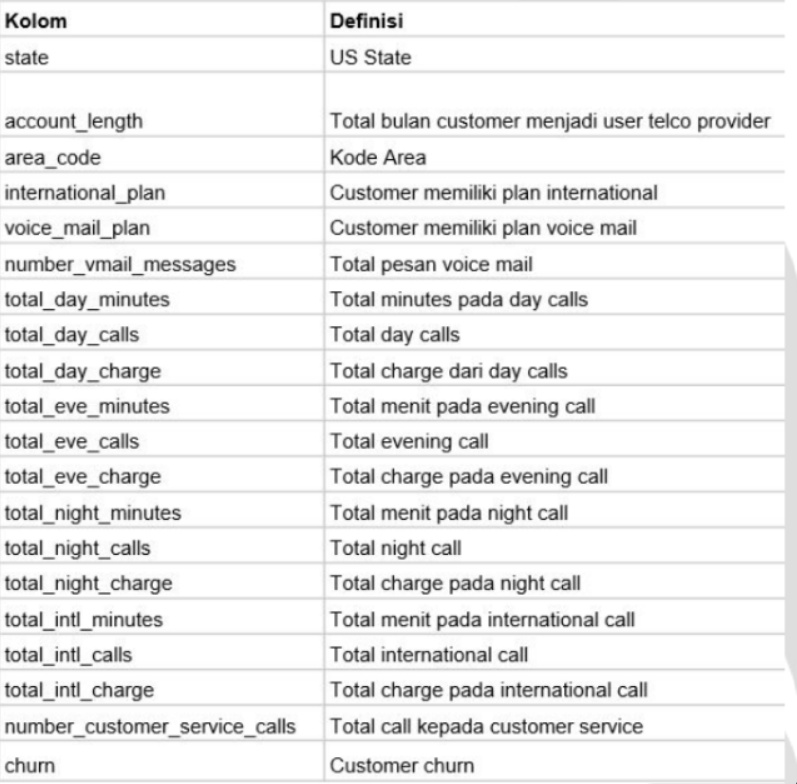

# Data Observation

## Data Shape

In [3]:
print("Dataframe has %d rows and %d columns" % df.shape)

Dataframe has 4250 rows and 20 columns


## Data Types

In [4]:
display(df.dtypes)

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## Missing Values Detection

In [5]:
display(df.isnull().sum())

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Duplicated Data Detection

In [6]:
if (True in df.duplicated().tolist()):
  print("There is duplicated rows in the dataset")
else:
  print("There is no duplicated rows in the dataset")

There is no duplicated rows in the dataset


## Categorical Data

In [7]:
# dataframe dengan tipe data object
df['area_code'] = df['area_code'].str.split('_').str[2]
df_category = df.select_dtypes(['object'])

# kita akan lihat data unik tiap kolom menggunakan looping
i = 0
while(i < df_category.shape[1]):
  display(df_category.iloc[:,i].unique())
  i = i + 1

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

array(['415', '408', '510'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['yes', 'no'], dtype=object)

array(['no', 'yes'], dtype=object)

## Numerical Data

### Data Distribution

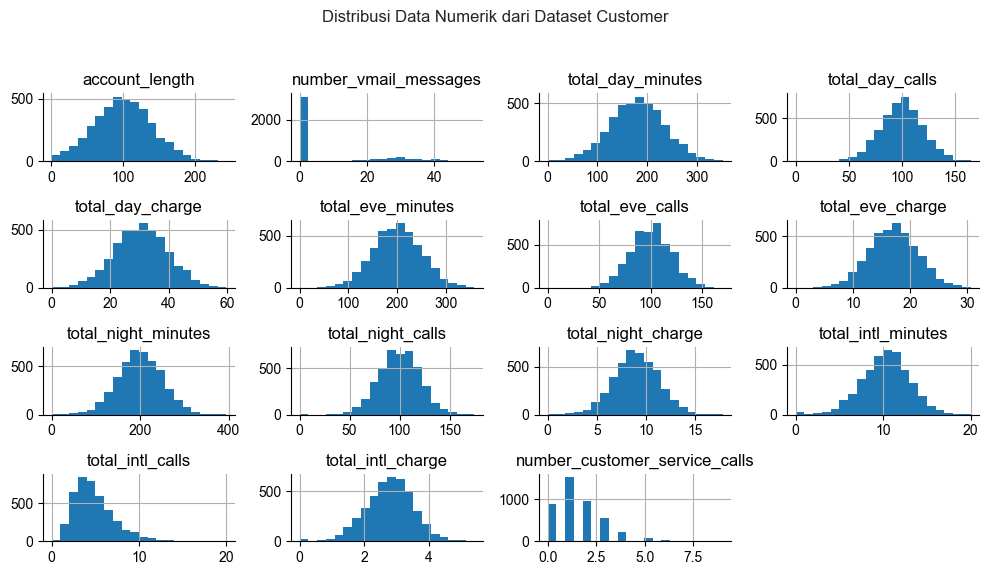

In [8]:
df_numerical = df.select_dtypes(['int64','float64'])
# facet & geometric object
ax = df_numerical.hist(figsize = (10,6), bins=20)

# aesthetics
sns.set_style('ticks')
sns.despine()
plt.suptitle('Distribusi Data Numerik dari Dataset Customer')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Outliers Detection

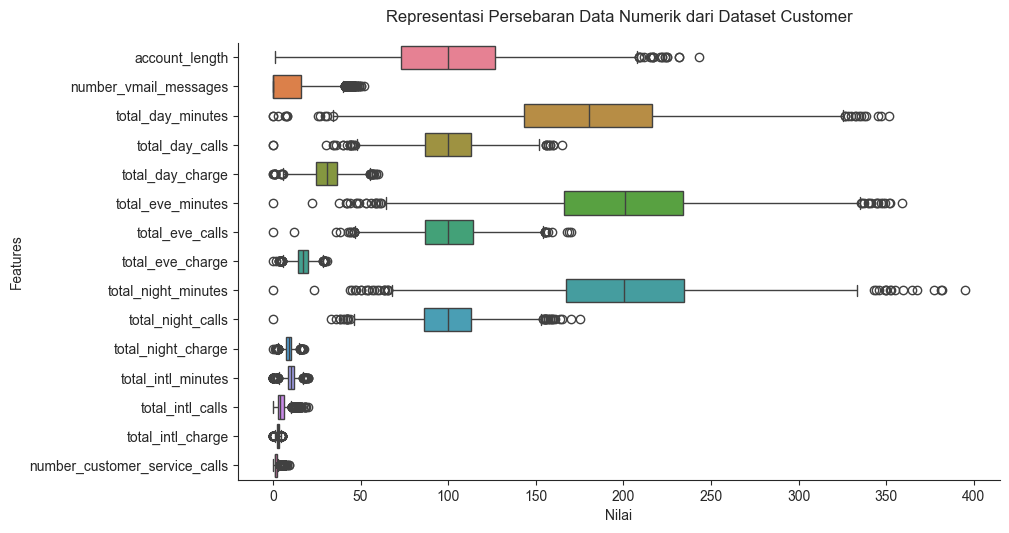

In [9]:
# facet
plt.figure(figsize=(10,5))

# geometric object
sns.boxplot(data=df_numerical, orient='h')

# aesthetics
sns.set_style('whitegrid')
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Representasi Persebaran Data Numerik dari Dataset Customer", pad=15)
plt.ylabel("Features")
plt.xlabel("Nilai")
plt.xticks(rotation=360)
plt.show()

# Statistical Analysis

## Churn Proportion

In [10]:
import plotly.express as px

# geometric object
fig = px.pie(
             values = [df["churn"].value_counts()['yes'],
                       df["churn"].value_counts()['no']],
             names = ["Churn", "Not Churn"],
             title = 'Customer Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                  marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                line = dict(color='#000000', width=2)))

fig.show()

## State & Churn Proportion

In [13]:
# make datafarame based on state and churn proportion
df_state_churn_prop = df[['state','churn']].where(df.churn=='yes').value_counts().to_frame().reset_index()
df_state_churn_prop.rename(columns={0 : 'churn count'}, inplace=True)

# geometric object
fig = px.choropleth(df_state_churn_prop,
                    locations = 'state',
                    locationmode = "USA-states",
                    scope = "usa",
                    color = 'count',
                    color_continuous_scale = "Blues",
                    title = 'Customer State and Churn Proportion'
                    )
# aesthetics
fig.add_scattergeo(
    locations = df_state_churn_prop['state'],
    locationmode = 'USA-states',
    text = df_state_churn_prop['state'],
    textfont=dict(color="Black"),
    mode='text',
    hoverinfo='skip')

fig.show()

## Area Code & Churn Proportion

In [15]:
# geometri object
fig = px.pie(df[['area_code','churn']].where(df.churn=='yes').value_counts().to_frame().reset_index().rename(columns={0 : 'churn count'}),
              values = 'count',
              names = 'area_code',
              title = 'Customer Area Code & Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                    marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                  line = dict(color='#000000', width=2)))

fig.show()

## Plan & Churn Proportion

In [16]:
# geometric object
fig = px.pie(
             values = [df[["international_plan",'churn']].where(df.churn=='yes').value_counts()['yes'][0],
                       df[["voice_mail_plan",'churn']].where(df.churn=='yes').value_counts()['yes'][0]],
             names = ["International Plan", "Voice Mail Plan"],
             title = 'Customer Plan & Churn Proportion')

# aesthetics
fig.update_traces(textfont_size = 20,
                  marker = dict(colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'],
                                line = dict(color='#000000', width=2)))

fig.show()

C:\Users\adrian.muhammad\AppData\Local\Temp\ipykernel_4596\3080693717.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\adrian.muhammad\AppData\Local\Temp\ipykernel_4596\3080693717.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## Descriptive Stats

In [17]:
# summary statistics dataframe
df_summary_stats = df_numerical.describe().loc['mean':,:].T.reset_index()
df_summary_stats.rename(columns={'index': 'feature'}, inplace=True)

# two zeros behind comma
pd.options.display.float_format = '{:,.2f}'.format
display(df_summary_stats)

,feature,mean,std,min,25%,50%,75%,max
0,account_length,100.24,39.70,1.00,73.00,100.00,127.00,243.00
1,number_vmail_messages,7.63,13.44,0.00,0.00,0.00,16.00,52.00
2,total_day_minutes,180.26,54.01,0.00,143.33,180.45,216.20,351.50
3,total_day_calls,99.91,19.85,0.00,87.00,100.00,113.00,165.00
4,total_day_charge,30.64,9.18,0.00,24.36,30.68,36.75,59.76
5,total_eve_minutes,200.17,50.25,0.00,165.93,200.70,233.78,359.30
6,total_eve_calls,100.18,19.91,0.00,87.00,100.00,114.00,170.00
7,total_eve_charge,17.02,4.27,0.00,14.10,17.06,19.87,30.54
8,total_night_minutes,200.53,50.35,0.00,167.22,200.45,234.70,395.00
9,total_night_calls,99.84,20.09,0.00,86.00,100.00,113.00,175.00


## Inferential Stats

### Numerical Data Correlation

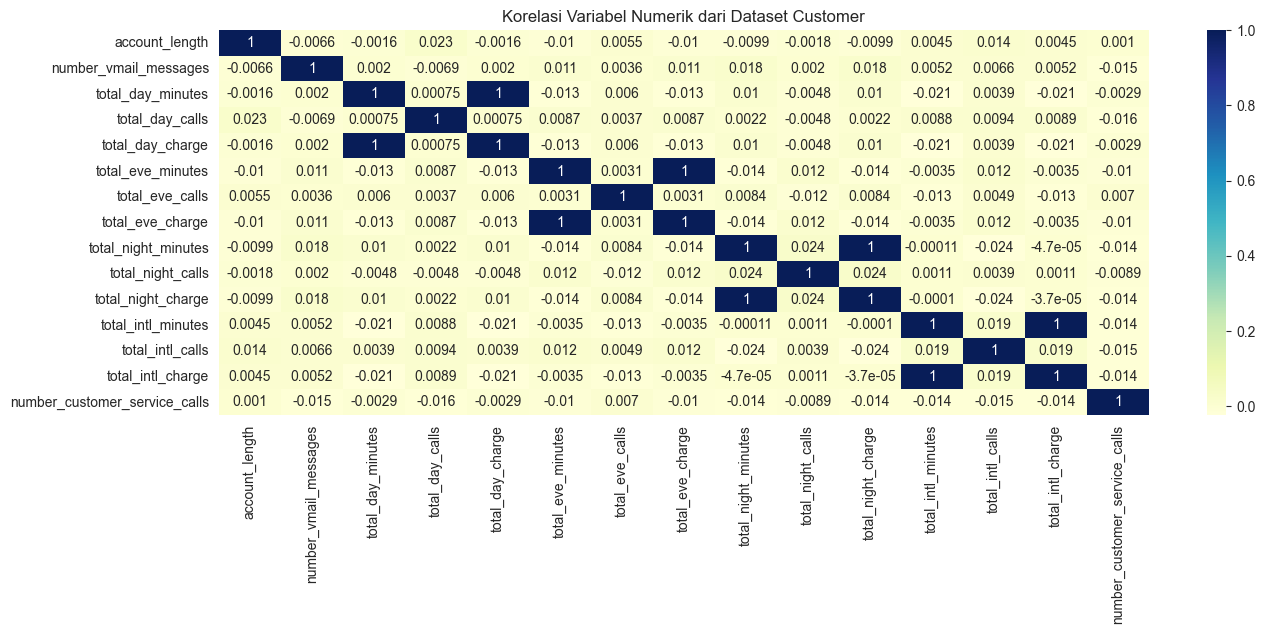

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(df_numerical.corr(), annot=True, cmap="YlGnBu")
plt.title("Korelasi Variabel Numerik dari Dataset Customer")
plt.show()

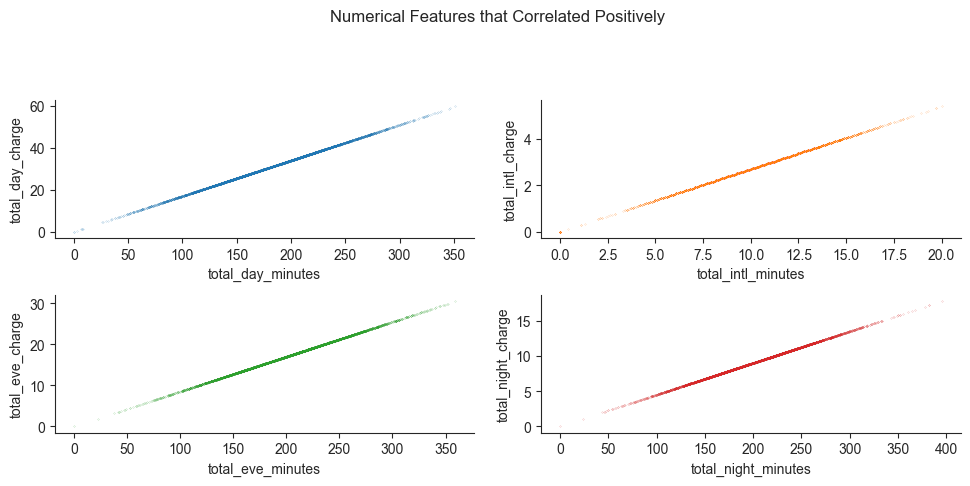

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
sns.set_style('ticks')
sns.despine()
fig.suptitle("Numerical Features that Correlated Positively")
plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2)

ax[0,0].plot(df['total_day_minutes'], df['total_day_charge'], 'o', markersize=0.1, color='tab:blue')
ax[0,0].set_xlabel('total_day_minutes')
ax[0,0].set_ylabel('total_day_charge')

ax[1,0].plot(df['total_eve_minutes'], df['total_eve_charge'], 'o', markersize=0.1, color='tab:green')
ax[1,0].set_xlabel('total_eve_minutes')
ax[1,0].set_ylabel('total_eve_charge')

ax[1,1].plot(df['total_night_minutes'], df['total_night_charge'], 'o', markersize=0.1, color='tab:red')
ax[1,1].set_xlabel('total_night_minutes')
ax[1,1].set_ylabel('total_night_charge')

ax[0,1].plot(df['total_intl_minutes'], df['total_intl_charge'], 'o', markersize=0.1, color='tab:orange')
ax[0,1].set_xlabel('total_intl_minutes')
ax[0,1].set_ylabel('total_intl_charge')

plt.show()

### Categorical Data Correlation

#### Chi-Square Test

First, let's establish the Null Hypothesis (H0):
- Assumption (H0): Two categorical variables are not related to each other.
- The result of the Chi-square Test shows the significance probability of accepting H0.

In this project, we will explore the correlation between categorical features and whether customers churn or not.

In [21]:
# Cross tabulation between categorical features and churn
crosstab_state = pd.crosstab(index = df_category['state'],
                             columns = df_category['churn'])
crosstab_area = pd.crosstab(index = df_category['area_code'],
                             columns = df_category['churn'])
crosstab_international = pd.crosstab(index = df_category['international_plan'],
                             columns = df_category['churn'])
crosstab_voice = pd.crosstab(index = df_category['voice_mail_plan'],
                             columns = df_category['churn'])

In [23]:
from scipy import stats

for i, j in zip([crosstab_area, crosstab_state, crosstab_international, crosstab_voice],
                ['Variable Area Code', 'Variable State', 'Variable International Plan', 'Variable Voice Mail Plan']):
    if stats.chi2_contingency(i)[1] >= 0.05:
        print("{} and Churn Variable are not related to each other.".format(j))
    else:
        print("{} and Churn Variable are related to each other.".format(j))


Variable Area Code and Churn Variable are not related to each other.
Variable State and Churn Variable are related to each other.
Variable International Plan and Churn Variable are related to each other.
Variable Voice Mail Plan and Churn Variable are related to each other.



From the results above, it can be observed that the p-value is greater than 0.05, indicating that H0 is accepted. This means that the two categorical variables do not have a relationship with each other.